In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

In [2]:
def date_to_datetime(data):
    data.time = pd.to_datetime(data.time, infer_datetime_format=True)

    data = data.set_index('time', drop=True)  

    return data    

In [3]:
data_v1 = pd.read_csv("data/data_v1.csv")
data_v2 = pd.read_csv("data/data_v2.csv")

data_v1 = date_to_datetime(data_v1)
data_v2 = date_to_datetime(data_v2)


In [66]:
data = data_v2.copy()

In [103]:
test_split_date = '2017-12-18'
#train_start_date = '2017-11-18'
train_start_date = '2015-01-01'

train = data.loc[(train_start_date <= data.index) & (data.index < test_split_date)]
test = data.loc[data.index >= test_split_date].dropna()

exog_train = train.drop(["price"], axis=1)
exog_test = test.drop(["price"], axis=1)

train=np.log(train.drop(["exog"], axis=1))
test=np.log(test.drop(["exog"], axis=1))

In [73]:
sarimax = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=50.46 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-210.130, Time=0.37 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-1708.890, Time=30.59 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-1144.089, Time=11.55 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=4122.257, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-1552.144, Time=0.67 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=92.93 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=32.42 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=-1662.310, Time=9.27 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=73.65 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=22.55 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=35.91 sec
 ARIMA(1,0,1)(1,0,0)[24] intercept   : AIC=-1520.976, Time=29.91 sec
 ARIMA(0,0,1)(1,0,0)[24] intercept   : AIC=71.821, Time=12.90 sec
 ARIMA(2,0,1)(1,0,0)[24] intercept  

AutoARIMA(m=24, trace=True)

In [74]:
mean_absolute_error(sarimax_pipeline.predict(168),test)

0.15100178198947728

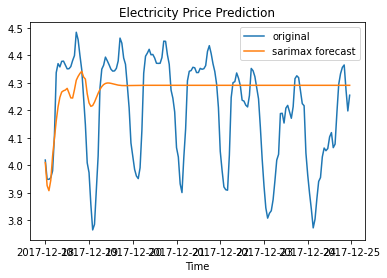

In [26]:
plt.plot(test, label='original')
plt.plot(test.index, sarimax_pipeline.predict(len(test)), label='sarimax forecast')
plt.xlabel('Time')
plt.title('Electricity Price Prediction')
plt.legend()
plt.show()

In [35]:
mean_absolute_error(np.exp(sarimax_pipeline.predict(len(test))),np.exp(test.price))

9.921683948466212

In [104]:
# sets up the SARIMAX model without exog
sarimax_c = SARIMAX(train, trend='c',        
                         order=(2, 1, 1),              # <-- keeping same parameters as before
                         seasonal_order=(2, 0, 2, 24)) # <-- we'll get into how we found these hyper parameters later



# trains the SARIMAX model
sarimax_results = sarimax_c.fit(maxiter=1000)



/home/ana/.virtualenvs/hckt03/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/ana/.virtualenvs/hckt03/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/ana/.virtualenvs/hckt03/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ana/.virtualenvs/hckt03/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: 

In [ ]:
# predictions
sarimax_predictions_exog = np.exp(sarimax_results.predict()) # grab the prediction from our model and undo the log transform using exp

In [ ]:
#eforecast
sarimax_forecast = sarimax_results.get_forecast(168)
mean_absolute_error(np.exp(sarimax_forecast.predicted_mean),np.exp(test))

In [ ]:
plt.plot(np.exp(train), label='original')
plt.plot(sarimax_predictions, label='sarimax forecast')
plt.xlabel('Time')
plt.title('# Electricity price')
plt.legend()
plt.show()

In [ ]:
plt.plot(np.exp(test), label='original')
plt.plot(np.exp(sarimax_forecast.predicted_mean), label='sarimax')
plt.xlabel('Time')
plt.title('Electricity price')
plt.legend()
plt.show()

In [95]:
# sets up the SARIMAX model
sarimax_exog = SARIMAX(train, exog = exog_train, trend='c',        
                         order=(2, 1, 1),              # <-- keeping same parameters as before
                         seasonal_order=(2, 0, 2, 24)) # <-- we'll get into how we found these hyper parameters later



# trains the SARIMAX model
sarimax_results_exog = sarimax_exog.fit(maxiter=1000)



/home/ana/.virtualenvs/hckt03/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/ana/.virtualenvs/hckt03/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [101]:
# predictions
sarimax_predictions_exog = np.exp(sarimax_results_exog.predict()) # grab the prediction from our model and undo the log transform using exp

In [97]:
#forecast
sarimax_forecast_exog = sarimax_results_exog.get_forecast(168, exog=exog_test)
mean_absolute_error(np.exp(sarimax_forecast_exog.predicted_mean),np.exp(test))

11.479098582184085

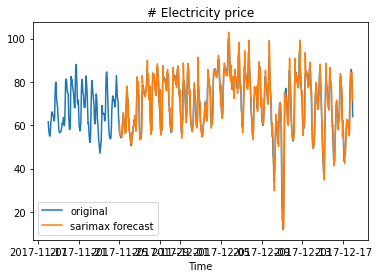

In [102]:
plt.plot(np.exp(train), label='original')
plt.plot(sarimax_predictions_exog, label='sarimax forecast')
plt.xlabel('Time')
plt.title('# Electricity price')
plt.legend()
plt.show()

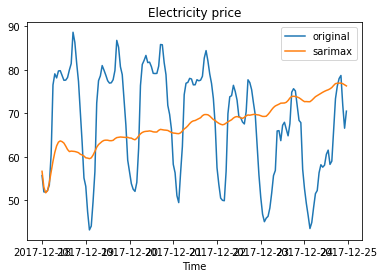

In [99]:
plt.plot(np.exp(test), label='original')
plt.plot(np.exp(sarimax_forecast_exog.predicted_mean), label='sarimax')
plt.xlabel('Time')
plt.title('Electricity price')
plt.legend()
plt.show()

In [ ]:
plt.plot(np.exp(test), label='original')
plt.plot(np.exp(sarimax_forecast.predicted_mean), label='sarimax')
plt.xlabel('Time')
plt.title('Electricity price')
plt.legend()
plt.show()

In [28]:
##WITH EXOGENOUS DATA

sarimax_pipeline_exog = Pipeline([  #The Box-Cox transform has been removed because it messes with the exogenous input
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24, 
                           method='nm',
                           maxiter=20,
                           
                          )
    )
])

sarimax_pipeline_exog.fit(train,exog_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=275.432, Time=4.58 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=2390.175, Time=0.27 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-26.829, Time=3.34 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=2392.710, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=3141.156, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-378.546, Time=0.28 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=-26.903, Time=3.18 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=64.328, Time=3.37 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=-271.825, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-264.977, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=2514.681, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[24] intercept   : AIC=-108.656, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[24]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,0,0)(0,0,0)[24] intercept
Total fit time: 20.747 seconds


Pipeline(steps=[('arima',
                 AutoARIMA(m=24, maxiter=20, method='nm', trace=True))])

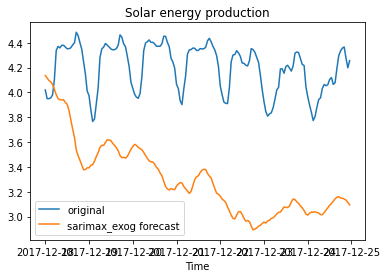

In [32]:
plt.plot(test, label='original')
plt.plot(test.index, sarimax_pipeline_exog.predict(len(test),exog_test), label='sarimax_exog forecast')
plt.xlabel('Time')
plt.title('Solar energy production')
plt.legend()
plt.show()

In [36]:
mean_absolute_error(np.exp(sarimax_pipeline_exog.predict(len(test),exog_test)),np.exp(test.price))

39.652857617553884